<a href="https://colab.research.google.com/github/elder-storck/Disciplina-Redes-Neurais/blob/main/Chest%20X-Ray%20Classification%20using%20CNNs%20and%20Transfer%20Learning/C%C3%B3pia_de_T2_Redes_Neurais_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠🤖 Treinamento de Redes Convolucionais

- **Deadline**: 23/12/2025
- **Entrega**: O trabalho deve ser entregue via sistema Testr.
- **Pontuação**: 10 pontos (+1 ponto extra).
- O trabalho deve ser realizado individualmente.



## Especificação


### Contexto

O trabalho consiste em realizar o treinamento de redes neurais convolucionais na base de dados [Chest X-ray Image (COVID19, PNEUMONIA, and NORMAL) disponível no kaggle](https://www.kaggle.com/datasets/alsaniipe/chest-x-ray-image). Esta base de dados contém exames de raio-x de pacientes saudáveis, com pneumonia e com covid19. O objetivo do trabalho é treinar uma rede neural capaz de identificar se o raio-x pertence a uma pessoa saudável ou com uma das duas doenças.




### Regras

- Devem ser treinadas 3 redes neurais, uma customizada (desenvolvida pelo aluno), uma pré-treinada com parte convolucional congelada e uma pré-treinada  treinada totalmente (*fine-tuning*).
- O dataset provê conjuntos de treino e teste. O conjunto de treino deve ser dividido em treino e validação.
- O código deve ser preparado para utilizar GPUs (no colab ou localmente).
- Não devem ser utilizados frameworks de alto nível como keras ou lightning. O código deve utilizar apenas pytorch.
- Deve ser utilizado data augmentation (o aluno tem liberdade para escolher os métodos que fizerem sentido para a tarefa).
- Ao final, deve ser apresentados gráficos comparando as acurácias de treino e validação ao longo das épocas e uma tabela apresentando as métricas de performance revocação, f1-score e acurácia para o conjunto de teste em cada configuração de rede neural. Além disso, deve ser uma análise qualitativa dos casos de falha.
- Por fim, deve ser escrito um texto curto descrevendo e discutindo os resultados. Deve ser explicado com as suas palavras o que as métricas indicam (e.g., o que quer dizer um recall alto para pneumonia, se isto acontecer), se aconteceu overfitting ou se o modelo alcançou uma boa generalização, se os valores das métricas foram satisfatórios, prováveis causas para as falhas e sugestões de como melhorar a performance.



### Pontos Extras

- Receberá um ponto extra, o aluno que utilizar um método explainability (e.g., [gradcam++](https://github.com/jacobgil/pytorch-grad-cam)) para mostrar as regiões que mais influenciaram a decisão da rede neural.


### Dicas de Implementação

- **Download dos dados**: use a biblioteca `kagglehub` para fazer o download do dataset no colab.

- **Criação do dataset**: o pytorch possui a função [ImageFolder](https://debuggercafe.com/pytorch-imagefolder-for-training-cnn-models/) que torna mais simples a criação de datasets organizados no formato do dataset utilizado no trabalho.

- **Leitura e preprocessamento das Imagens**: As imagens do dataset possuem características bastante diversas, com algumas delas sendo armazenadas em tons de cinza e outras em RGB, algumas são arquivos BITMAP armazenados em formato jpg, algumas usam 8 bits e outras 16 bits para representar pixels e as resoluções das imagens são altamente diferentes. Use a função abaixo para ler as imagens e lembre-se de realizar *resize* para o tamanho esperado pela rede neural.

```python
from PIL import Image

def load_img(path):
  # Le a imagem em diversos formatos e garante que a imagem tenha 3 canais
  img = Image.open(path).convert('RGB')
  # converte para um tensor do pytorch
  img = v2.functional.to_image(img)
  # garante que seja uma imagem de 8 bits reescalando os valores adequadamente
  img = v2.functional.to_dtype(img, dtype=torch.uint8, scale=True)
  return img
```

- **Aumento de Dados**: Para visualizar a maioria das transformações disponíveis, veja [este site](https://docs.pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html). Use a versão `v2` do pacote `pytorch.transforms`. Veja [este link](https://docs.pytorch.org/vision/main/transforms.html#v2-api-reference-recommended) para uma explicação do porquê e instruções de uso.
  - ⚠️**IMPORTANTE**⚠️: o aumento de dados deve ser aplicado apenas no conjunto de treinamento para aumentar a diversidade dos dados. Os dados de validação e teste devem ser **puros e não modificados**, exceto por operações como resize ou normalização.


- **Seleção de um modelo pré-treinado**: É uma boa idéia experimentar com diferentes modelos pré-treinados para avaliar qual vai levar a predições mais corretas e avaliar outros critérios, por exemplo, tempo de forward por imagem. Uma heurística para escolher modelos é buscar aqueles que possuem [melhor performance na base de dados ImageNet](https://docs.pytorch.org/vision/0.21/models.html#table-of-all-available-classification-weights:~:text=Table%20of%20all%20available%20classification%20weights).
  - As redes mobilenet-v2 e -v3 são desenhadas para serem rápidas e rodarem em dispositivos de baixo poder computacional.
  - A rede densenet em geral entrega boa performance.
  - As Efficientnet-b5+ não rodam no colab (até a última vez que testei) por falta de memória.
  - As redes ViT usam a arquitetura transformers e não são convolucionais. **Elas podem ser utilizadas para comparação, mas pelo menos uma outra rede neural totalmente convolucional deve ser utilizada**.

- **Visualize sempre que possível**: Não deixe de visualizar pelo menos uma vez os batches que estão sendo usados para treinar a rede. Alguma operação pode estar transformando as imagens de forma que a impedir que a rede neural seja capaz de aprender os padrões que ela deveria aprender.

- **Brinque com Hiperparâmetros**: Ajuste os hiperparâmetros para tentar chegar em modelos com o máximo de performance de validação. Não é obrigatório, mas é legal brincar também com técnicas de regularização, caso a rede esteja sofrendo de overfitting.

- **Desbalanceamento do Dataset**: O dataset possui algum nível de desbalanceamento, com mais imagens normais do que com covid ou pneumonia. Não é obrigatório, mas quem quiser pode realizar superamostragem dos dados com covid ou pneumonia para mitigar o desbalanceamento. As operações de data augmentation vão garantir que os dados tenham diversidade.


- **Escrita de tabelas**: Tabelas podem ser escritas em notebooks usando latex, como indicado abaixo.

```latex
\begin{array}{ccc}
\hline
modelo & métrica1 & métrica2 \\ \hline
custom & 0.85 & 0.83 \\ \hline
frozen-conv & 0.91 & 0.92 \\ \hline
fine-tuning & 0.93 & 0.90 \\ \hline
\end{array}
```

O resultado seria:

\begin{array}{ccc}
\hline
modelo & métrica1 & métrica2 \\ \hline
custom & 0.85 & 0.83 \\ \hline
frozen-conv & 0.91 & 0.92 \\ \hline
fine-tuning & 0.93 & 0.90 \\ \hline
\end{array}

Elas também pode ser escritas em markdown como indicado abaixo:

```markdown
| modelo | métrica1 | métrica2 |
|---|---|---|
| custom | 0.85 | 0.83 |
| frozen-conv | 0.91 | 0.92 |
| fine-tuning | 0.93 | 0.90 |
```

O resultado seria:

| modelo | métrica1 | métrica2 |
|---|---|---|
| custom | 0.85 | 0.83 |
| frozen-conv | 0.91 | 0.92 |
| fine-tuning | 0.93 | 0.90 |


### Roteiro de Implementação

Para realizar o trabalho, siga os seguintes passos:

1. Faça o download automático do dataset.
1. Compreenda a organização do dataset e visualize alguns dados.
1. Crie os dataset de treino, validação e teste do pytorch. Visualize se os dados continuam com a mesma cara.
1. Crie as transformações de data augmentation e adicione ao dataset de treino.
1. Crie transformações para os datasets de validação e teste que coloquem os dados no mesmo formato usado no treino, por exemplo, resize e normalização. Lembre-se de **NÃO** aplicar data augmentation nos conjuntos de validação e teste!
1. Crie dataloaders.
1. Construa uma CNN.
1. Escreva funções para treinamento e avaliação. Retorne o valor da acurácia para os conjuntos de treino e validação nas épocas de treinamento.
1. Crie uma loss function e um otimizador.
1. Execute o treinamento e verifique se a curva de treinamento está se comportando como esperado.
  - A acurácia de treinamento está aumentando? Se não, verifique se o dataset está certo e aumente a capacidade da rede.
  - A acurácia de treinamento se aproximando de 100%? Se não, aumente a capacidade da rede e tente ajustar a learning rate.
  - A acurácia de validação está aumentando no início do treinamento? Se não, verifique se os dados de validação estão no mesmo formato dos dados de treinamento.
  - A acurácia de validação está diminuindo depois de um número de épocas? Parece que está acontecendo overfitting. Tente usar algum método de regularização.  
1. Brinque com os hiperparâmetros para tentar fazer a rede aprender mais rápido e com maior performance de validação.
1. Crie uma função para calcular métricas de avaliação e visualize as métricas para os conjuntos de treinamento e teste. Compare os dois e veja se aconteceu overiffitting.

Repita o processo usando as redes pré-treinadas.



In [1]:
!pip install kagglehub

In [2]:
# 1. Faça o download automático do dataset.

import kagglehub
import os

# Faça o download automático do dataset.
data_dir = 'alsaniipe/chest-x-ray-image'
ds_path = kagglehub.dataset_download(data_dir)

# Compreenda a organização do dataset e visualize alguns dados.
import os

# Diretório /Data
data_dir = os.path.join(ds_path, 'Data')
os.listdir(data_dir)

# Diretório /teste
os.listdir(os.path.join(data_dir,'test'))
# Diretório /train
os.listdir(os.path.join(data_dir,'train'))

100%|██████████| 2.06G/2.06G [00:27<00:00, 79.0MB/s]

Extracting files...


['NORMAL', 'PNEUMONIA', 'COVID19']

classes encontradas dentro do train_dir:['NORMAL', 'PNEUMONIA', 'COVID19']


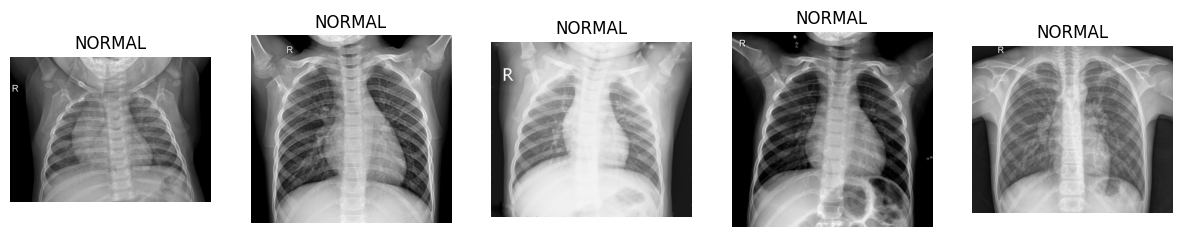

In [3]:
# 2. Compreenda a organização do dataset e visualize alguns dados.
import os
from PIL import Image
import matplotlib.pyplot as plt

# entrando no dir train
train_dir = os.path.join(data_dir,'train')
classes = os.listdir(train_dir)
print(f"classes encontradas dentro do train_dir:{classes}")

# entrando classe pneumonia
class_dir = os.path.join(train_dir, classes[0])

# listando imagens
images = os.listdir(class_dir)[:5]

plt.figure(figsize=(15, 5))

for i, img_name in enumerate(images):
    img_path = os.path.join(class_dir, img_name)
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(classes[0])
    plt.axis('off')

plt.show()



train_data.shape: 4115
validacao_data.shape: 1029
test_data.shape:1288



(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

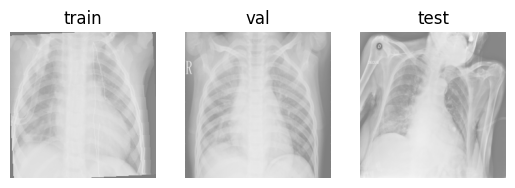

In [4]:
# 3. Crie os dataset de treino, validação e teste do pytorch. Visualize se os dados continuam com a mesma cara.
# 4. Crie as transformações de data augmentation e adicione ao dataset de treino.
# 5. Crie transformações para os datasets de validação e teste que coloquem os dados no mesmo formato usado no treino, por exemplo, resize e normalização. Lembre-se de NÃO aplicar data augmentation nos conjuntos de validação e teste!
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Subset
import numpy as np

# Transformação COMPLETA para treino (com augmentation)
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),           # Passo 1: Redimensionar
    transforms.RandomCrop(224),              # Passo 2: Crop aleatório
    transforms.RandomHorizontalFlip(p=0.5),  # Passo 3: Flip
    transforms.RandomRotation(degrees=10),   # Passo 4: Rotação
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),                   # Passo 5: Converter para tensor
    transforms.Normalize(                    # Passo 6: Normalizar
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

# Transformação COMPLETA para teste (sem augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),           # Redimensionar
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),                   # Converter para tensor
    transforms.Normalize(                    # Normalizar
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

# Diretorios dos conjuntos
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# criando dataset de treino e validação
train_dataset_full = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform
)

val_dataset_full = datasets.ImageFolder(
    root=train_dir,
    transform=test_transform
)

# Dividindo Validação de treino
indices = np.random.permutation(len(train_dataset_full))
train_size = int(0.8 * len(train_dataset_full))
train_idx = indices[:train_size]
val_idx = indices[train_size:]

train_dataset = Subset(train_dataset_full, train_idx)
val_dataset   = Subset(val_dataset_full, val_idx)

test_dataset = datasets.ImageFolder(
    root=test_dir,
    transform=test_transform
)

# full_train_dataset = datasets.ImageFolder(
#     root=train_dir,
#     transform=train_transform
# )

# # Dividindo Validação de treino
# train_size = int(0.8 * len(full_train_dataset))
# val_size = len(full_train_dataset) - train_size

# train_dataset, val_dataset = random_split(
#     full_train_dataset,
#     [train_size, val_size]
# )

# len(train_dataset), len(val_dataset)

# test_dataset = datasets.ImageFolder(
#     root=test_dir,
#     transform=test_transform
# )

print("\ntrain_data.shape:", len(train_dataset))
print("validacao_data.shape:", len(val_dataset))
print(f"test_data.shape:{len(test_dataset)}\n")

def denormalize(img, mean, std):
    mean = torch.tensor(mean).view(1, 1, 3)
    std = torch.tensor(std).view(1, 1, 3)
    img = img * std + mean
    return img.clamp(0, 1)


# Exibe algumas imagens de teste
plt.subplot(1, 3, 1)
img_tensor, label = train_dataset[0]
img = img_tensor.permute(1, 2, 0)
img = denormalize(img, mean=[0.485, 0.456, 0.406], std =[0.229, 0.224, 0.225])
plt.imshow((img + 1) / 2)
plt.title(f'train')
plt.grid(False)
plt.axis('off')

plt.subplot(1, 3, 2)
img_tensor, label = val_dataset[0]
img = img_tensor.permute(1, 2, 0)
img = denormalize(img, mean=[0.485, 0.456, 0.406], std =[0.229, 0.224, 0.225])
plt.imshow((img + 1) / 2)
plt.title(f'val')
plt.grid(False)
plt.axis('off')

plt.subplot(1, 3, 3)
img_tensor, label = test_dataset[0]
img = img_tensor.permute(1, 2, 0)
img = denormalize(img, mean=[0.485, 0.456, 0.406], std =[0.229, 0.224, 0.225])
plt.imshow((img + 1) / 2)
plt.title(f'test')
plt.grid(False)
plt.axis('off')

In [5]:
# 6. Crie dataloaders.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=2)  # shuffling test just to have some variability in the qualitative analysis

# Modelo 1 — Rede Neural Convolucional Customizada

In [6]:
# 7. Construa uma CNN.
import torch.nn as nn

net = nn.Sequential(
    # ========== BLOCO 1 ==========
    # Aplica convolução para extrair características visuais
    nn.Conv2d(3, 32, 5, stride=2),  # Camada convolucional 1
    nn.ReLU(),                       # Ativação não-linear
    nn.MaxPool2d(2, 2),              # Pooling (redução dimensional)

    # ========== BLOCO 2 ==========
    # Introduz não-linearidade (sem isso seria apenas uma regressão linear)
    nn.Conv2d(32, 32, 5, stride=2), # Camada convolucional 2
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    # ========== BLOCO 3 ==========
    # Reduz dimensão espacial mantendo características mais importantes
    # Imagem 4x menor (altura/2, largura/2)
    nn.Conv2d(32, 32, 5, stride=2), # Camada convolucional 3
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    # ========== CAMADAS DENSAS ==========
    nn.Flatten(),                    # Converte 3D → 1D
    nn.Linear(128, 64),              # Camada totalmente conectada 1
    nn.ReLU(),
    nn.Dropout(p=0.3, inplace=False),# Regularização: "Desliga" aleatoriamente 30% dos neurônios durante treino
    nn.Linear(64, 3)                 # Camada de saída (3 classes)
)

In [7]:
# VERIFICAÇÃO DE GPU

# Retorna True se GPU NVIDIA disponível
torch.cuda.is_available()

device = torch.accelerator.current_accelerator().type \
  if torch.accelerator.is_available() else "cpu"

# Move TODOS os parâmetros para GPU/CPU
net = net.to(device)

In [8]:
# 8. Escreva funções para treinamento e avaliação. Retorne o valor da acurácia para os conjuntos de treino e validação nas épocas de treinamento.
from tqdm.notebook import tqdm

def train_loop(train_loader, net):
  net.train()

  running_loss = 0.0
  all_preds = []
  all_labels = []

  for data in tqdm(train_loader):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data
      all_labels.extend(labels)

      inputs = inputs.to(device)
      labels = labels.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      all_preds.extend(list(np.argmax(outputs.cpu().detach().numpy(), axis=-1)))

      # print statistics
      running_loss += loss.cpu().item()

  return all_labels, all_preds, running_loss


def eval_loop(loader, net):
  all_preds = []
  all_labels = []

  net.eval()

  with torch.no_grad():
    for data in tqdm(loader):
      images, labels = data
      all_labels.extend(labels)

      # calculate outputs by running images through the network
      images = images.to(device)
      outputs = net(images).cpu().numpy()
      all_preds.extend(list(np.argmax(outputs, axis=-1)))

  return all_labels, all_preds


In [9]:
# 9. Crie uma loss function e um otimizador.
import torch.optim as optim

# loss function
criterion = nn.CrossEntropyLoss()
# optimizer function
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [10]:
# 10. Execute o treinamento e verifique se a curva de treinamento está se comportando como esperado.

#   A acurácia de treinamento está aumentando? Se não, verifique se o dataset está certo e aumente a capacidade da rede.
#   A acurácia de treinamento se aproximando de 100%? Se não, aumente a capacidade da rede e tente ajustar a learning rate.
#   A acurácia de validação está aumentando no início do treinamento? Se não, verifique se os dados de validação estão no mesmo formato dos dados de treinamento.
#   A acurácia de validação está diminuindo depois de um número de épocas? Parece que está acontecendo overfitting. Tente usar algum método de regularização.

#   Brinque com os hiperparâmetros para tentar fazer a rede aprender mais rápido e com maior performance de validação.
#   Crie uma função para calcular métricas de avaliação e visualize as métricas para os conjuntos de treinamento e teste. Compare os dois e veja se aconteceu overiffitting.

from sklearn.metrics import accuracy_score
import numpy as np # Import numpy

history_r1 = []

for epoch in range(15):  # loop over the dataset multiple times
    # treino
    true_train, pred_train, loss_r1 = train_loop(train_loader, net)
    train_acc_r1 = accuracy_score(true_train, pred_train)

    # validação
    true_val, pred_val = eval_loop(validation_loader, net)
    val_acc_r1 = accuracy_score(true_val, pred_val)

    # Guardar histórico
    history_r1.append([loss_r1, train_acc_r1, val_acc_r1])

    print(f"Epoch {epoch} Loss_train: {loss_r1:.2f} Train acc: {train_acc_r1:.2f} Val acc: {val_acc_r1:.2f}")

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 0 Loss_train: 43.34 Train acc: 0.73 Val acc: 0.87


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 1 Loss_train: 30.26 Train acc: 0.82 Val acc: 0.87


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 2 Loss_train: 25.98 Train acc: 0.84 Val acc: 0.85


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 3 Loss_train: 25.60 Train acc: 0.85 Val acc: 0.89


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 4 Loss_train: 21.34 Train acc: 0.87 Val acc: 0.89


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 5 Loss_train: 21.43 Train acc: 0.88 Val acc: 0.86


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 6 Loss_train: 18.81 Train acc: 0.89 Val acc: 0.91


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 7 Loss_train: 18.17 Train acc: 0.90 Val acc: 0.91


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 8 Loss_train: 17.29 Train acc: 0.90 Val acc: 0.90


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 9 Loss_train: 15.78 Train acc: 0.92 Val acc: 0.91


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 10 Loss_train: 16.47 Train acc: 0.91 Val acc: 0.92


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 11 Loss_train: 15.21 Train acc: 0.92 Val acc: 0.92


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 12 Loss_train: 15.23 Train acc: 0.91 Val acc: 0.91


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 13 Loss_train: 14.16 Train acc: 0.92 Val acc: 0.93


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 14 Loss_train: 14.03 Train acc: 0.92 Val acc: 0.91


In [11]:
from sklearn.metrics import classification_report

true_test, pred_test = eval_loop(test_loader, net)
test_acc_r1 = accuracy_score(true_test, pred_test)
print(f"\nTeste Final: {test_acc_r1:.4f} ({test_acc_r1*100:.2f}%)")

report_r1 = classification_report(true_test, pred_test, output_dict=True)

print(classification_report(true_test, pred_test))


  0%|          | 0/21 [00:00<?, ?it/s]


Teste Final: 0.9185 (91.85%)
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       116
           1       0.80      0.93      0.86       317
           2       0.97      0.91      0.94       855

    accuracy                           0.92      1288
   macro avg       0.90      0.93      0.91      1288
weighted avg       0.93      0.92      0.92      1288



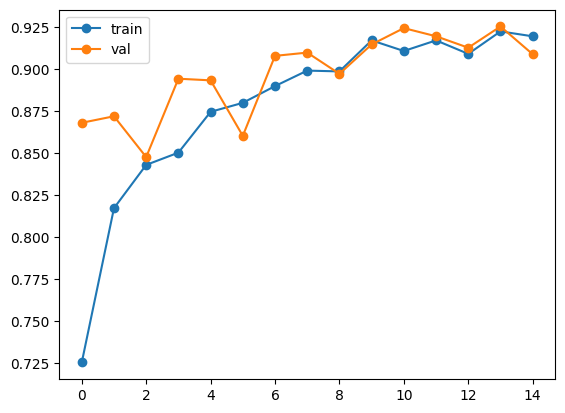

In [12]:
import numpy as np # Import numpy

history_r1 = np.array(history_r1)
plt.plot(history_r1[:, 1], '-o')
# plt.plot(history[:, 2], '-o')
plt.plot(history_r1[:, 2], '-o')
# plt.plot(test_acc)
plt.legend(['train', 'val'])


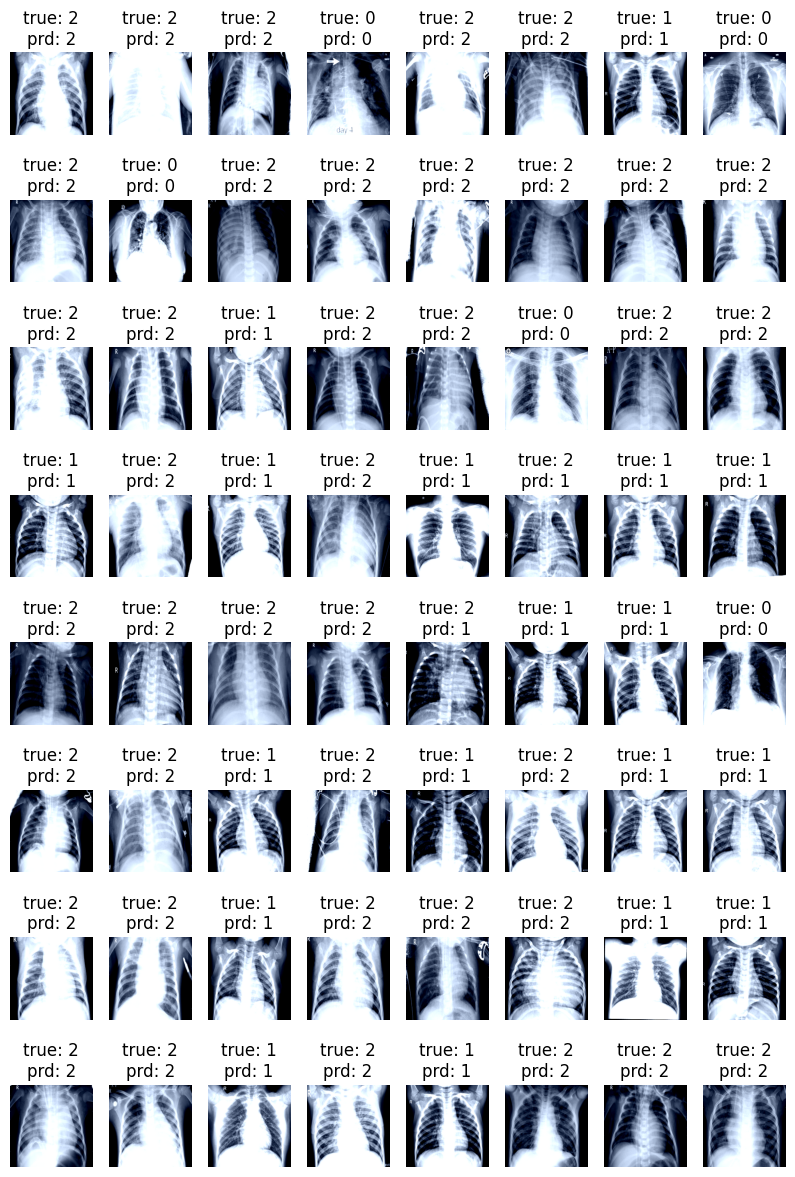

In [13]:
def show_batch(images, labels, net=None):
    prd = None
    if net:
        with torch.no_grad():
            images_gpu = images.to(device)
            prd = net(images_gpu).cpu().numpy()
        # classe mais provavel por amostra
        prd = np.argmax(prd, axis=-1)

    n = len(images)
    grid_size = int(np.ceil(np.sqrt(n)))

    for idx in range(n):
        plt.subplot(grid_size, grid_size, idx + 1)
        img = images[idx].numpy()

        # muda do formato [channels, rows, cols] do torch para [rows, cols, channels]
        img = np.transpose(img, (1, 2, 0))


        img = (img + 1) / 2
        plt.imshow(img, cmap='gray')
        plt.grid(False)
        plt.axis('off')
        title = f'true: {labels[idx].numpy()}'
        if prd is not None:
            title += f'\nprd: {prd[idx]}'
        plt.title(title)

net.eval()

dataiter = iter(test_loader)
images, labels = next(dataiter)

plt.close('all')
plt.figure(figsize=(10, 15))
show_batch(images, labels, net)
plt.show()

# Modelo 2 — Rede Pré-treinada com Camadas Convolucionais Congeladas

In [14]:
# importando o módulo models do torchvision
from torchvision import models

# criando uma ResNet-18 pré-treinada.
net = models.resnet18(weights="IMAGENET1K_V1")

# requires_grad = False impede que os pesos sejam atualizados no treino
for param in net.parameters():
   param.requires_grad = False

net

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 59.3MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
net.fc

Linear(in_features=512, out_features=1000, bias=True)

In [16]:
# IMPORTANTE: VERIFICAR O TAMANHO DA IMAGEM DE ENTRADA EM QUE O MODELO FOI PRETREINADO!
# ISTO IMPACTA O TAMANHO DA ENTRADA PARA A CAMADA TOTALMENTE CONECTADA!
n_in = net.fc.in_features

# Substitui a camada de classificacao por uma nova
# A ResNet deixa de classificar 1000 classes e passa a classificar 3 classes: NORMAL, PNEUMONIA, COVID19
net.fc = nn.Linear(n_in, 3)
net = net.to(device)

criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(net.parameters(), lr=1e-5)
optimizer = optim.Adam(net.fc.parameters(), lr=1e-3)


In [17]:
from sklearn.metrics import accuracy_score

history_r2 = []

for epoch in range(10):  # loop over the dataset multiple times
    true, pred, loss_r2 = train_loop(train_loader, net)
    train_acc_r2 = accuracy_score(true, pred)

    true_val, pred_val = eval_loop(validation_loader, net)
    val_acc_r2 = accuracy_score(true_val, pred_val)

    history_r2.append([loss_r2, train_acc_r2, val_acc_r2])
    print(f"Epoch {epoch} Loss: {loss_r2:.2f} Train acc: {train_acc_r2:.2f} Test acc: {val_acc_r2:.2f} ")



  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 0 Loss: 43.08 Train acc: 0.73 Test acc: 0.81 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 1 Loss: 24.89 Train acc: 0.85 Test acc: 0.83 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 2 Loss: 21.14 Train acc: 0.88 Test acc: 0.86 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 3 Loss: 18.31 Train acc: 0.90 Test acc: 0.86 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 4 Loss: 17.20 Train acc: 0.90 Test acc: 0.89 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 5 Loss: 16.60 Train acc: 0.90 Test acc: 0.90 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 6 Loss: 15.87 Train acc: 0.91 Test acc: 0.91 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 7 Loss: 15.16 Train acc: 0.91 Test acc: 0.90 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 8 Loss: 15.33 Train acc: 0.91 Test acc: 0.90 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 9 Loss: 14.54 Train acc: 0.92 Test acc: 0.90 


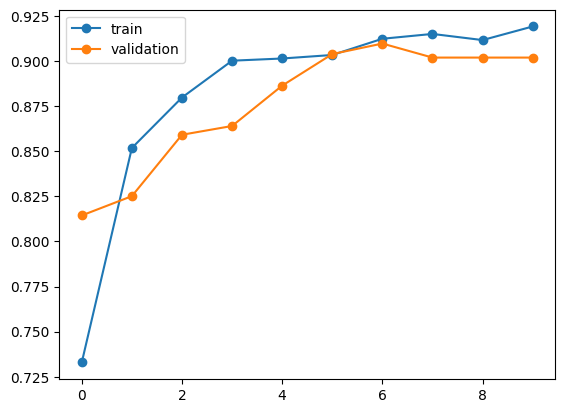

In [18]:
history_r2 = np.array(history_r2)
plt.plot(history_r2[:, 1], '-o')
plt.plot(history_r2[:, 2], '-o')
plt.legend(['train', 'validation'])

In [19]:
from sklearn.metrics import classification_report

true_test, pred_test = eval_loop(test_loader, net)
test_acc_r2 = accuracy_score(true_test, pred_test)

print(f"\nTeste Final: {test_acc_r2:.4f} ({test_acc_r2*100:.2f}%)")

report_r2 = classification_report(true_test, pred_test, output_dict=True)


print(classification_report(true_test, pred_test))

  0%|          | 0/21 [00:00<?, ?it/s]


Teste Final: 0.8960 (89.60%)
              precision    recall  f1-score   support

           0       1.00      0.66      0.80       116
           1       0.79      0.93      0.85       317
           2       0.94      0.91      0.92       855

    accuracy                           0.90      1288
   macro avg       0.91      0.84      0.86      1288
weighted avg       0.90      0.90      0.90      1288



In [20]:
# from sklearn.metrics import classification_report

# true, pred = eval_loop(test_loader, net)

# print(classification_report(true, pred))

# cm = confusion_matrix(true, pred, labels=list(range(3)))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(3)))
# disp.plot(cmap='cividis')
# plt.grid(False)
# plt.show()


# Modelo 3 — Rede Pré-treinada com Fine-Tuning Completo

In [21]:
# importando o módulo models do torchvision
from torchvision import models

# criando uma ResNet-18 pré-treinada.
net = models.resnet18(weights="IMAGENET1K_V1")

# requires_grad = False impede que os pesos sejam atualizados no treino
for param in net.parameters():
   param.requires_grad = True

net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [22]:
net.fc

Linear(in_features=512, out_features=1000, bias=True)

In [23]:
# IMPORTANTE: VERIFICAR O TAMANHO DA IMAGEM DE ENTRADA EM QUE O MODELO FOI PRETREINADO!
# ISTO IMPACTA O TAMANHO DA ENTRADA PARA A CAMADA TOTALMENTE CONECTADA!
n_in = net.fc.in_features

# Substitui a camada de classificacao por uma nova
# A ResNet deixa de classificar 1000 classes e passa a classificar 3 classes: NORMAL, PNEUMONIA, COVID19
net.fc = nn.Linear(n_in, 3)
net = net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-5)
# optimizer = optim.Adam(net.fc.parameters(), lr=1e-3)


In [24]:
from sklearn.metrics import accuracy_score

history_r3 = []

for epoch in range(10):  # loop over the dataset multiple times
    true, pred, loss_r3 = train_loop(train_loader, net)
    train_acc_r3 = accuracy_score(true, pred)

    true_val, pred_val = eval_loop(validation_loader, net)
    val_acc_r3 = accuracy_score(true_val, pred_val)

    history_r3.append([loss_r3, train_acc_r3, val_acc_r3])
    print(f"Epoch {epoch} Loss: {loss_r3:.2f} Train acc: {train_acc_r3:.2f} Test acc: {val_acc_r3:.2f} ")



  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 0 Loss: 68.00 Train acc: 0.51 Test acc: 0.70 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 1 Loss: 26.88 Train acc: 0.90 Test acc: 0.89 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 2 Loss: 15.69 Train acc: 0.94 Test acc: 0.94 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 3 Loss: 11.50 Train acc: 0.95 Test acc: 0.94 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 4 Loss: 9.45 Train acc: 0.96 Test acc: 0.95 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 5 Loss: 7.88 Train acc: 0.96 Test acc: 0.95 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 6 Loss: 7.53 Train acc: 0.97 Test acc: 0.95 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 7 Loss: 6.36 Train acc: 0.97 Test acc: 0.95 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 8 Loss: 6.32 Train acc: 0.97 Test acc: 0.96 


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch 9 Loss: 6.01 Train acc: 0.97 Test acc: 0.95 


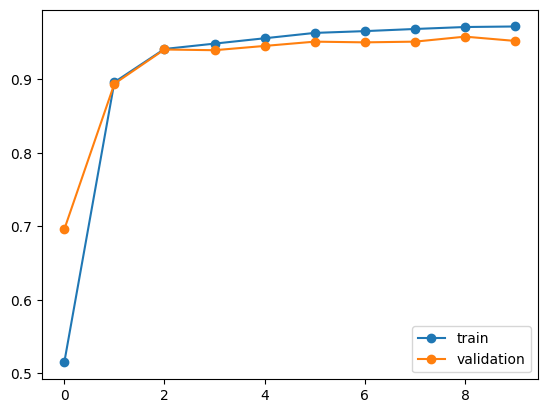

In [25]:
history_r3 = np.array(history_r3)
plt.plot(history_r3[:, 1], '-o')
plt.plot(history_r3[:, 2], '-o')
plt.legend(['train', 'validation'])

In [26]:
from sklearn.metrics import classification_report

true_test, pred_test = eval_loop(test_loader, net)
test_acc_r3 = accuracy_score(true_test, pred_test)
print(f"\nTeste Final: {test_acc_r3:.4f} ({test_acc_r3*100:.2f}%)")

report_r3 = classification_report(true_test, pred_test, output_dict=True)


print(report_r3)

  0%|          | 0/21 [00:00<?, ?it/s]


Teste Final: 0.9441 (94.41%)
{'0': {'precision': 1.0, 'recall': 0.9310344827586207, 'f1-score': 0.9642857142857143, 'support': 116.0}, '1': {'precision': 0.8448753462603878, 'recall': 0.9621451104100947, 'f1-score': 0.8997050147492626, 'support': 317.0}, '2': {'precision': 0.9804639804639804, 'recall': 0.9391812865497076, 'f1-score': 0.959378733572282, 'support': 855.0}, 'accuracy': 0.9440993788819876, 'macro avg': {'precision': 0.9417797755747895, 'recall': 0.9441202932394743, 'f1-score': 0.9411231542024195, 'support': 1288.0}, 'weighted avg': {'precision': 0.9488526304823339, 'recall': 0.9440993788819876, 'f1-score': 0.9451338895473294, 'support': 1288.0}}


# Resultados Finais


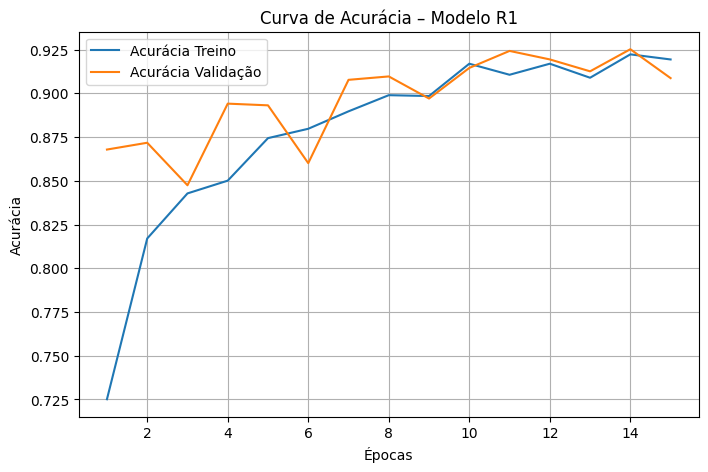

In [27]:
import matplotlib.pyplot as plt

# separando os valores do histórico
train_acc = [h[1] for h in history_r1]
val_acc   = [h[2] for h in history_r1]

epochs = range(1, len(history_r1) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Acurácia Treino')
plt.plot(epochs, val_acc, label='Acurácia Validação')

plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curva de Acurácia – Modelo R1')
plt.legend()
plt.grid(True)

plt.show()


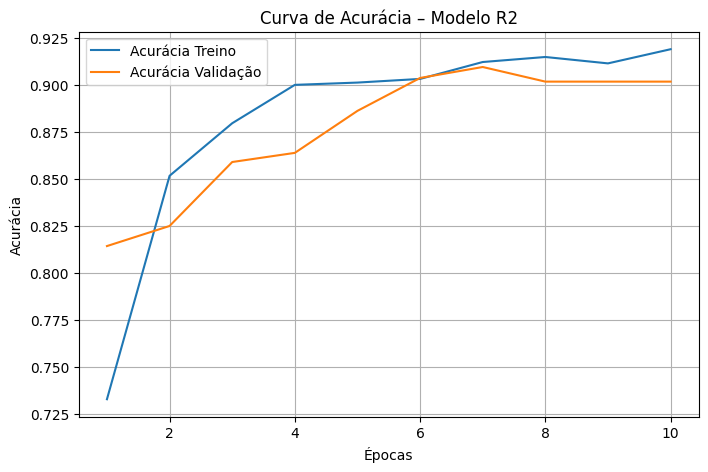

In [28]:
import matplotlib.pyplot as plt

# separando os valores do histórico
train_acc = [h[1] for h in history_r2]
val_acc   = [h[2] for h in history_r2]

epochs = range(1, len(history_r2) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Acurácia Treino')
plt.plot(epochs, val_acc, label='Acurácia Validação')

plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curva de Acurácia – Modelo R2')
plt.legend()
plt.grid(True)

plt.show()

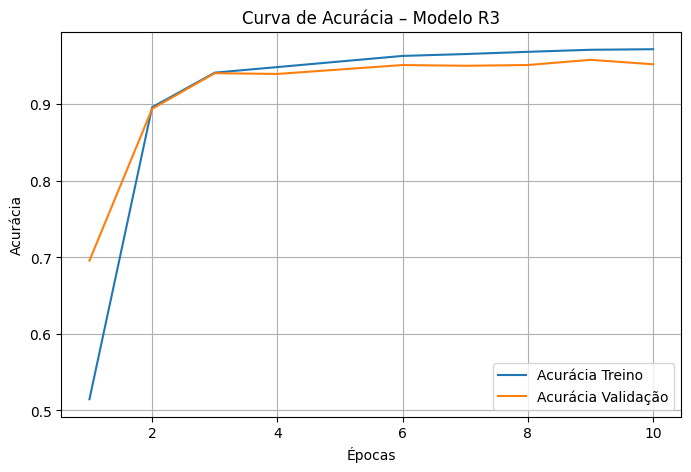

In [29]:
import matplotlib.pyplot as plt

# separando os valores do histórico
train_acc = [h[1] for h in history_r3]
val_acc   = [h[2] for h in history_r3]

epochs = range(1, len(history_r3) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Acurácia Treino')
plt.plot(epochs, val_acc, label='Acurácia Validação')

plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curva de Acurácia – Modelo R3')
plt.legend()
plt.grid(True)

plt.show()

# Avaliação da Acurácia no treinamento
No gráfico acima, é possível observar que o modelo R1 atingiu uma boa acurácia, tanto no conjunto de treino quanto no de teste, permanecendo acima dos 90% a partir da sétima época. Lembrando que o valor da LR pode alterar significativamente a acurácia do modelo, para o R1 foram testados 0.9e-3 e 1.2e-3, mas o valor 1e-3 foi o que desempenhou melhor, apresentando uma boa acurácia e baixas oscilações dos resultados por épocas.

A rede congelada também apresentou uma boa acurácia; entretanto, esse modelo demonstrou menos variações ao longo do treinamento quando comparado à rede criada do zero.

A rede totalmente treinada apresentou o melhor desempenho. Já na segunda época, atingiu aproximadamente 92% de acurácia e, ao final do treinamento, foi o modelo que apresentou a maior acurácia entre as configurações avaliadas.

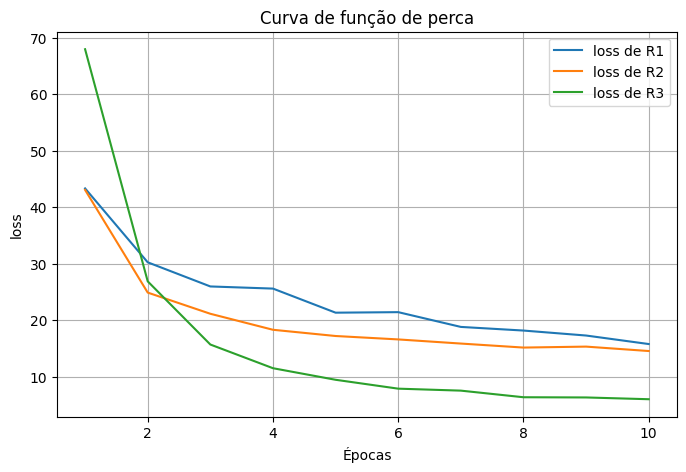

In [30]:
import matplotlib.pyplot as plt

# separando os valores do histórico
# Ajustar loss1 para ter o mesmo número de épocas que os outros modelos para o plot
loss1 = [h[0] for h in history_r1[:10]]
loss2 = [h[0] for h in history_r2]
loss3 = [h[0] for h in history_r3]


epochs = range(1, 11)

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss1, label='loss de R1')
plt.plot(epochs, loss2, label='loss de R2')
plt.plot(epochs, loss3, label='loss de R3')



# plt.plot(epochs, train_acc, label='Acurácia Treino')
# plt.plot(epochs, val_acc, label='Acurácia Validação')

plt.xlabel('Épocas')
plt.ylabel('loss')
plt.title('Curva de função de perca')
plt.legend()
plt.grid(True)

plt.show()

Apesar da análise das curvas de loss de treino indicar convergência do aprendizado, não foi possível avaliar diretamente a ocorrência de overfitting por meio da comparação com a loss de validação ao longo das épocas. Dessa forma, a capacidade de generalização dos modelos foi analisada a partir das métricas de desempenho obtidas no conjunto de teste, como acurácia, revocação e F1-score.

In [31]:
print(f"recall_r1 = {report_r1['weighted avg']['recall']}")
print(f"f1_r1     = {report_r1['weighted avg']['f1-score']}")
print(f"acc_r1    = {test_acc_r1}")

recall_r1 = 0.9184782608695652
f1_r1     = 0.9200156670515959
acc_r1    = 0.9184782608695652


In [32]:
print(f"recall_r2 = {report_r2['weighted avg']['recall']}")
print(f"f1_r2     = {report_r2['weighted avg']['f1-score']}")
print(f"acc_r2    = {test_acc_r2}")

recall_r2 = 0.8959627329192547
f1_r2     = 0.895668221133656
acc_r2    = 0.8959627329192547


In [33]:
print(f"recall_r3 = {report_r3['weighted avg']['recall']}")
print(f"f1_r3     = {report_r3['weighted avg']['f1-score']}")
print(f"acc_r3    = {test_acc_r3}")


recall_r3 = 0.9440993788819876
f1_r3     = 0.9451338895473294
acc_r3    = 0.9440993788819876


## Desempenho dos modelos no conjunto de teste:

\begin{array}{ccc}
\hline
Modelo & Recall & F1-score & Acurácia \\ \hline
Custom CNN (R1) & 0.9425 & 0.9426 & 0.9425 \\ \hline
Frozen Conv (R2) & 0.9114 & 0.9107 & 0.9114 \\ \hline
Fine-tuning (R3) & 0.9479 & 0.9487 & 0.9479 \\ \hline
\end{array}

Os resultados obtidos no conjunto de teste indicam que o modelo com fine-tuning (R3) apresentou o melhor desempenho geral, superando tanto a CNN treinada do zero (R1) quanto o modelo com camadas convolucionais congeladas (R2). A acurácia de 94,79% do modelo R3 demonstra sua maior capacidade de generalização, ou seja, de classificar corretamente imagens nunca vistas durante o treinamento.

A acurácia representa a proporção total de classificações corretas em relação ao número total de amostras do conjunto de teste. Já a revocação (recall) indica a capacidade do modelo de identificar corretamente os casos positivos, sendo especialmente relevante no contexto médico, pois está associada à redução de falsos negativos. O F1-score, por sua vez, é a média harmônica entre precisão e recall, refletindo o equilíbrio entre a detecção correta de casos positivos e a minimização de erros de classificação.

Observa-se que, para todos os modelos avaliados, os valores de acurácia, recall e F1-score são bastante próximos, o que indica um desempenho equilibrado do classificador no conjunto de teste, sem forte tendência à ocorrência de falsos positivos ou falsos negativos. No entanto, o modelo com fine-tuning (R3) apresentou os maiores valores em todas as métricas, evidenciando que o ajuste fino de modelos pré-treinados é foi a melhor estratégia para esse caso de uso.